# PANDAS LESSON

In [1]:
# Pandas is typically used for working with data stored in a tabular format (Data in a spreadsheet format)
# It provides helper functions to read data stored in different formats such as; CSV, JSON, Excel spreadsheets, HTML tables, SQL, e.t.c
import pandas as pd
ford_df = pd.read_csv("C:\\Users\\HP\\Desktop\\Metro Tech Hub Training\\ford data assignment.csv") # This reads the file you want to work on
ford_df.columns = ford_df.columns.str.strip()
ford_df # views first 5 and last 5 rows of the data
ford_df.info() # shows us every info to know about the data
ford_df.describe() # gives us the statistical properties of the data
ford_df.columns # gives you the columns in the dataset
ford_df.shape # gives you the number of rows and columns in the data
ford_df.head() # gives the first 5 rows of the data
type(ford_df["model"]) # each column is represented using a data structure called series
ford_df["fuelType"].unique() # gives the unique values in that column
ford_df["fuelType"][50]  # getting a data from a column by indexing
ford_df["model"][50]
ford_df.at[50, "model"] # another way to get data from a column using .at This gets the row and column for a specific data
ford_df.transmission # same as ford_df["transmission"]
ford_df[["model", "year"]] # you can pass in a list of columns just to view
# You can also access specific rows from the data. Pandas allows to use .loc
ford_df.loc[50] # each retrieved row is also a series object
ford_df.head(10) # viewing first 10 rows of the data
ford_df.tail(10) # viewing the last 10 rows of the data
ford_df.at[0, "model"]

# When you want to find the first index that does not contain a Nan value, you use this code: "ford_df.(name of column).first_valid_index"
ford_df.model.first_valid_index # but there is no Nan in this dataset
ford_df.sample(20) # gets a random sample of rows from the data
ford_df.loc[100:115] # getting a range of columns using the .loc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17812 entries, 0 to 17811
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   price         17812 non-null  object 
 3   transmission  17812 non-null  object 
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  object 
 6   tax           17812 non-null  object 
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.2+ MB


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
100,Fiesta,2016,"$8,998.00",Manual,31373,Petrol,$-,65.7,1.0
101,Kuga,2018,"$18,498.00",Manual,7796,Diesel,$145.00,54.3,1.5
102,Kuga,2017,"$13,498.00",Manual,26597,Diesel,$145.00,54.3,2.0
103,Kuga,2017,"$14,998.00",Manual,15978,Diesel,$30.00,64.2,1.5
104,Kuga,2017,"$13,998.00",Automatic,13265,Petrol,$240.00,38.2,1.5
105,EcoSport,2016,"$9,998.00",Manual,20491,Petrol,$125.00,52.3,1.0
106,Tourneo Connect,2017,"$10,998.00",Manual,16310,Petrol,$125.00,50.4,1.0
107,Focus,2017,"$17,698.00",Manual,14557,Petrol,$145.00,41.5,2.0
108,Focus,2017,"$11,498.00",Semi-Auto,30917,Petrol,$125.00,51.4,1.0
109,Focus,2017,"$12,798.00",Manual,22153,Diesel,$145.00,74.3,1.5


# Analyzing The Data

In [2]:
ford_df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,"$12,000.00",Automatic,15944,Petrol,$150.00,57.7,1.0
1,Focus,2018,"$14,000.00",Manual,9083,Petrol,$150.00,57.7,1.0
2,Focus,2017,"$13,000.00",Manual,12456,Petrol,$150.00,57.7,1.0
3,Fiesta,2019,"$17,500.00",Manual,10460,Petrol,$145.00,40.3,1.5
4,Fiesta,2019,"$16,500.00",Automatic,1482,Petrol,$145.00,48.7,1.0
5,Fiesta,2015,"$10,500.00",Manual,35432,Petrol,$145.00,47.9,1.6
6,Puma,2019,"$22,500.00",Manual,2029,Petrol,$145.00,50.4,1.0
7,Fiesta,2017,"$9,000.00",Manual,13054,Petrol,$145.00,54.3,1.2
8,Kuga,2019,"$25,500.00",Automatic,6894,Diesel,$145.00,42.2,2.0
9,Focus,2018,"$10,000.00",Manual,48141,Petrol,$145.00,61.4,1.0


In [3]:
# Cleaning and converting 'price' column
ford_df["price"] = (
    ford_df["price"]
    .astype(str)  # Ensure all values are strings for processing
    .str.replace("$", "", regex=False)  # Remove dollar signs
    .str.replace(",", "", regex=False)  # Remove commas
    .str.strip()  # Strip extra whitespace
    .apply(lambda x: pd.to_numeric(x, errors="coerce"))  # Convert to numeric, invalid values become NaN
)

# Replace NaN values with 0 if needed
ford_df["price"] = ford_df["price"].fillna(0)

# Calculate the total money generated
total_money = ford_df["price"].sum()
print("Total money generated is:", total_money)


Total money generated is: 218545337.0


In [4]:
# Cleaning and converting 'tax' column
ford_df["tax"] = (
    ford_df["tax"]
    .astype(str)  # Ensure all values are strings for processing
    .str.replace("$", "", regex=False)  # Remove dollar signs
    .str.replace(",", "", regex=False)  # Remove commas
    .str.strip()  # Strip extra whitespace
    .apply(lambda x: pd.to_numeric(x, errors="coerce"))  # Convert to numeric, invalid values become NaN
)

# Replace NaN values with 0 if needed
ford_df["tax"] = ford_df["tax"].fillna(0)

# Calculate the total tax generated
total_tax = ford_df["tax"].sum()
print("Total tax generated is:", total_tax)

ford_df.info()


Total tax generated is: 2018367.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17812 entries, 0 to 17811
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   price         17812 non-null  float64
 3   transmission  17812 non-null  object 
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  object 
 6   tax           17812 non-null  float64
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.2+ MB


# Querying and Sorting Rows with Pandas

In [5]:
# Prices above 10,000 usd
prices_above = ford_df["price"] > 10000
prices_above.head(20)
ford_df[prices_above].shape # You can check the the prices that met the above condition
# It is better this way:
prices_above = ford_df[ford_df["price"] > 10000]
prices_above.head(6)

# sorting
ford_df.sort_values("year", ascending=False).head(20) # sorting the year column in descending order

# Just incas you are working with a data that has date, it comes with the datatype (object). You have to convert it to a datetime datatype.
# You do that by (pd.todatetime())

# Adding a new column to the original dataset
ford_df.head(10)
ford_df["profit"] = ((ford_df["price"]) - (ford_df["tax"])) # added a profit column
print("\nAdded a 'profit' column:")
print(ford_df[["price", "tax", "profit"]].head(10))
ford_df.head(10)



Added a 'profit' column:
     price    tax   profit
0  12000.0  150.0  11850.0
1  14000.0  150.0  13850.0
2  13000.0  150.0  12850.0
3  17500.0  145.0  17355.0
4  16500.0  145.0  16355.0
5  10500.0  145.0  10355.0
6  22500.0  145.0  22355.0
7   9000.0  145.0   8855.0
8  25500.0  145.0  25355.0
9  10000.0  145.0   9855.0


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,profit
0,Fiesta,2017,12000.0,Automatic,15944,Petrol,150.0,57.7,1.0,11850.0
1,Focus,2018,14000.0,Manual,9083,Petrol,150.0,57.7,1.0,13850.0
2,Focus,2017,13000.0,Manual,12456,Petrol,150.0,57.7,1.0,12850.0
3,Fiesta,2019,17500.0,Manual,10460,Petrol,145.0,40.3,1.5,17355.0
4,Fiesta,2019,16500.0,Automatic,1482,Petrol,145.0,48.7,1.0,16355.0
5,Fiesta,2015,10500.0,Manual,35432,Petrol,145.0,47.9,1.6,10355.0
6,Puma,2019,22500.0,Manual,2029,Petrol,145.0,50.4,1.0,22355.0
7,Fiesta,2017,9000.0,Manual,13054,Petrol,145.0,54.3,1.2,8855.0
8,Kuga,2019,25500.0,Automatic,6894,Diesel,145.0,42.2,2.0,25355.0
9,Focus,2018,10000.0,Manual,48141,Petrol,145.0,61.4,1.0,9855.0


In [6]:
year_2020 = ford_df[ford_df["year"] == 2020] # filtered year 2020
year_2020.head(10)
year_2020.count() # I can check the count of my data by using .count
ford_df["model"] = ford_df["model"].str.strip()
ford_df["model"].unique()
ford_df["fuelType"].unique()

yearly_price = ford_df[ford_df["year"] == 2019] # filtering out the year I want to get the total sum of price and tax
yearly_price.head(5)
ford_2019_metrics = yearly_price[["price", "tax"]] # getting the columns I want to sum
ford_2019_metrics.head(5)
total_pt_2019 = ford_2019_metrics.sum() # sum of the columns
total_pt_2019 # view

# Grouping and Aggregating
all_year_total_sales = ford_df.groupby("year")[["price", "tax"]].sum() # grouping on a yearly basis to get the total amount for price and tax
all_year_total_sales # view


,price,tax
year,,
1996,3000.0,265.0
1998,2699.0,160.0
2000,1995.0,160.0
2002,5785.0,750.0
2003,6189.0,725.0
2004,5744.0,720.0
2005,25488.0,3425.0
2006,28634.0,2355.0
2007,83314.0,6680.0


In [7]:
# Writing data back to a file
result_ford_df = ford_df # After cleaning te data, checking for redundancies, stripping, adding new columns, e.t.c, you can now write the data
# back to a new file
result_ford_df # view

# to write it into a file, we use the .to_csv function.
result_ford_df.to_excel("output.xlsx", sheet_name="ford result", index=False) # writing to an excel format
result_ford_df.to_csv("ford result", index=False) # writing to a csv format

# BASIC PLOTTING WITH PANDAS

<Axes: xlabel='year'>

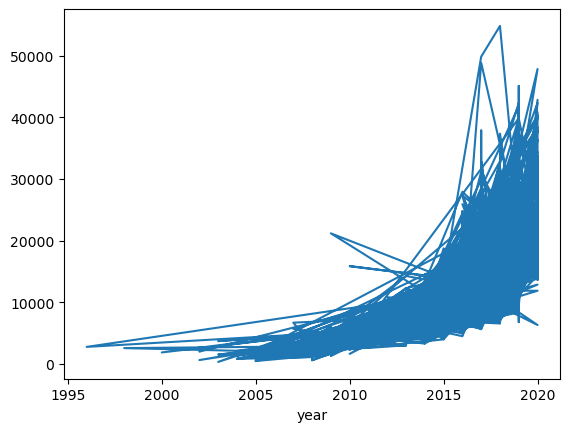

In [8]:
result_ford_df.head(10)
data_plot = result_ford_df.copy() # making another copy of the dataframe and any modification to the new copy won't affect the original copy
data_plot.head(5) # view
data_plot.set_index("year", inplace=True) # you can as well set any column of the data to become an index
data_plot.head(5) # view
data_plot.loc[2020] # .loc picks the index you want to view and in this case 2020

data_plot["profit"].plot() # the ploot is not fine because pandas can only do basic plotting. The data here is in thousands